# Exhaustive Enumeration Search

## Find the square root of n
Search the full range.  It is the simplest method, but less efficient.

In [1]:
import numpy

def f(x, c):
    '''The value of f at x for f(x) = x^2-c'''
    return x**2-c

def exhaustive_enumeration(c, threshold, max_cycles=10000):
    lower_bound = 0
    upper_bound = max(1, c)
    count = 1

    guess = lower_bound
    fx = f(guess, c)
    while not abs(fx) < threshold:
        guess += threshold/100
        fx = f(guess, c)
        count += 1
        if count > max_cycles:
            print('Maximum number of cycles exceeded')
            break
    return guess

inp = .250
threshold = 0.001 
max_cyc = int(inp/threshold)
result = exhaustive_enumeration(inp, threshold, max_cyc)
if result:
    print('The square root of {} is {:5.2f}'.format(inp, result))
from math import sqrt
print('The answer from the math library is {}'.format(sqrt(inp)))


The square root of 0.25 is  0.50
The answer from the math library is 0.5


## Bisection
In the method, the search space is reduced by half in every iteration.

Number of iterations =  18
0.44721412658691406


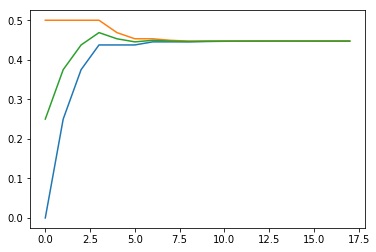

In [4]:
import numpy

def f(x, c):
    '''The value of f at x for f(x) = x^2-c'''
    return x**2-c

def bisection_method(c, threshold=1e-6, max_cycles=1e6):
    max_cycles = int(max_cycles)
    count = 0
    plot_data = []
    low = 0
    high = max(1, c)
    guess = (low + high ) /2
    fx = f(guess, c)
    while not abs(fx) < threshold:
        if count > max_cycles:
            print('Number of cycles exceeded')
        if fx < 0:
            low = guess
        else:
            high = guess
        guess = (low + high ) /2
        fx = f(guess, c)
        plot_data.append([low, high, guess])
        count += 1
    print('Number of iterations = ', count)
    import matplotlib.pyplot as plt
    import numpy as np
    data = np.array(plot_data)
    plt.plot(data)
    return guess
    

inp =  .2
print(bisection_method(inp))

## Newtons method

Finding root by Newtons Method (also called Newton-Raphson Method)

### Plotting the fucntion

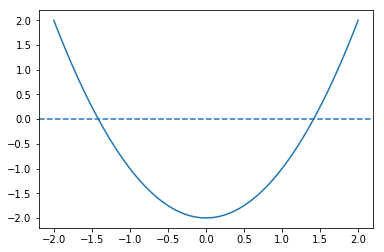

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, c):
    '''The value of f at x for f(x) = x^2-c'''
    return x**2-c

def plotf(f, a, b, c):
    x = np.linspace(a,b, 100)
    y = [f(i, c) for i in x]
    plt.plot(x,y)
    plt.axhline(0, linestyle='dashed')
    plt.show()

plotf(f, -2, 2, 2)

$$ x1 = x0 - {f(x0)/f^{'}(x0)} $$

Number of iterations =  6


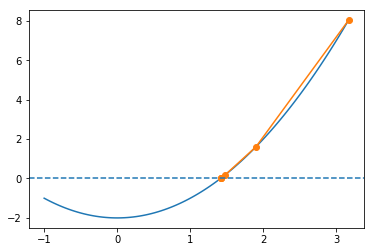

1.4142135623732204


In [43]:
import numpy

def f(x, c):
    '''The value of f at x for f(x) = x^2-c'''
    return x**2-c

def d(x):
    '''The first derivative for f(x)'''
    return 2*x

def nr_method(c, guess, threshold=1e-6, max_cycles=1e6):
    max_cycles = int(max_cycles)
    count = 0
    
    fx = f(guess, c)
    x = [] # for plotting
    y = [] # for plotting
    while not abs(fx) < threshold:
        dx = d(guess)
        guess = guess - fx/dx
        fx = f(guess, c)
        x.append(guess) # for plotting
        y.append(fx)    # for plotting
        if count > max_cycles:
            print('Number of cycles exceeded')
        count += 1
    print('Number of iterations = ', count)
    
    x1 = np.linspace(-1, x[0], 100)
    y1 = [f(i, c) for i in x1]
    plt.plot(x1,y1)
    plt.plot(x, y, marker='o')
    plt.axhline(0, linestyle='dashed')
    plt.show()
    return guess
    

inp =  2
guess = 6
print(nr_method(inp, guess))